In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv("./breast-cancer.csv")

diagnosis = {'M': 1, 'B': 0}
data['diagnosis'] = data['diagnosis'].map(diagnosis)

train_data=data.iloc[0:80*len(data)//100]
test_data=data.iloc[80*len(data)//100:]
test_data_answers=test_data["diagnosis"]
test_data=test_data.loc[:,test_data.columns != "diagnosis"]

./breast-cancer.csv
./breastCancer.ipynb
./breastCancerRandomForest.ipynb


InvalidIndexError: (slice(None, None, None), array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True]))

In [6]:
train_data.head()

,id,diagnosis,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
0,842302,1,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003
1,842517,1,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389
2,84300903,1,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250
3,84348301,1,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963
4,84358402,1,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756


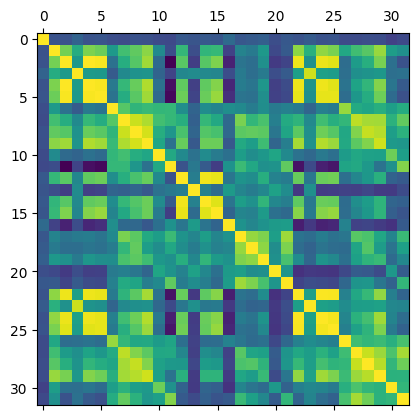

C:\Users\alexy\AppData\Local\Temp\ipykernel_5140\363462781.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(to_drop, axis=1, inplace=True)


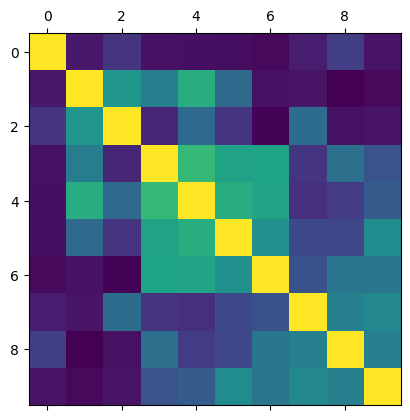

In [4]:
# Find highly correlated columns and remove then for Naive Bayes approach

import matplotlib.pyplot as plt


correlation=train_data.corr().abs()

plt.matshow(train_data.corr())
plt.show()

upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

correlationCoefficent=0.7

to_drop = [column for column in upper.columns if any(upper[column] > correlationCoefficent) and column!="diagnosis"]

train_data.drop(to_drop, axis=1, inplace=True)




plt.matshow(train_data.corr())
plt.show()


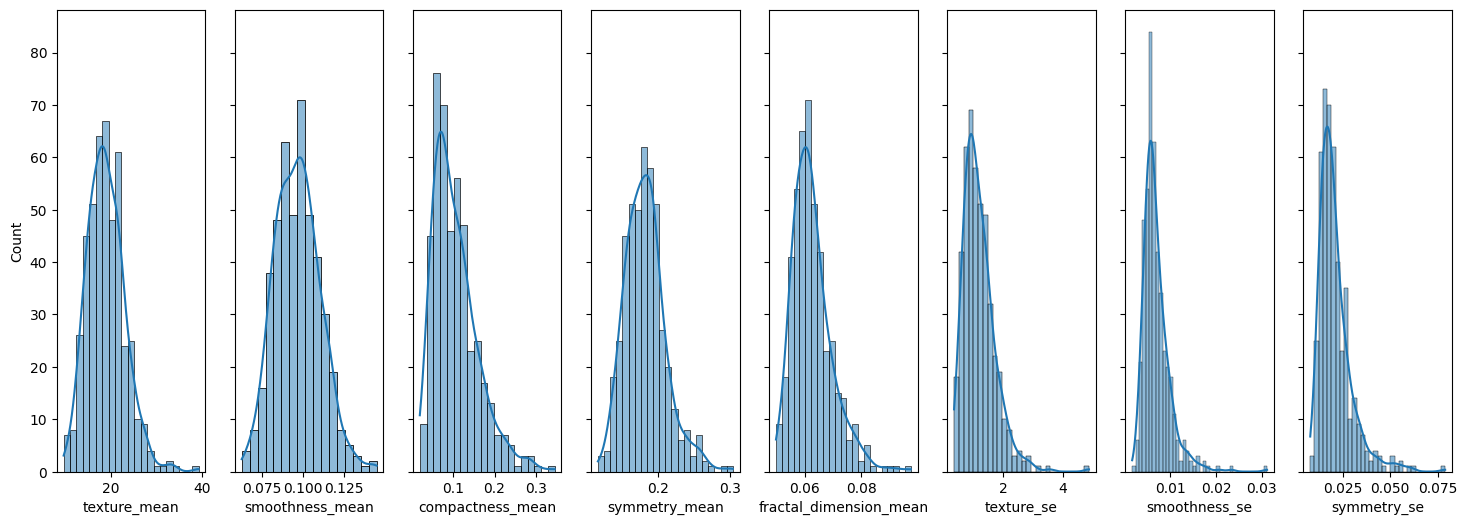

In [5]:
features=[column for column in train_data.columns if not (column=="id" or column=="diagnosis")]
fig, axes = plt.subplots(1, len(features), figsize=(18, 6), sharey=True)
for i in range(len(features)):
    sns.histplot(train_data, ax=axes[i], x=features[i], kde=True)

In [48]:
def calculatePy(y):
    malignant=len(train_data.loc[train_data.diagnosis==1]["diagnosis"])
    probability=np.float64(malignant/len(train_data))
    if y==1:
        return probability
    else:
        return 1-probability

def calculateXforY(column,x,y):
    df=train_data.loc[train_data.diagnosis==y][["diagnosis",column]]
    std=df[column].std()
    print(type(std))
    mean=df[column].mean()
    print(type(mean))

    return (1/(np.sqrt(2*np.pi)*std))* np.exp(-((x-mean)**2 / (2*std**2)))


    # return len(desired)/len(df)


In [19]:
print(type(calculatePy(0)))

<class 'float'>


In [50]:
def predictNaiveBayes(features,featureValues):
    yZero=calculatePy(0)
    yOne=calculatePy(1)
    print(type(yZero))
    print(type(yOne))
    for i in range(len(features)):
        if features[i] in train_data.columns:
            yZero=yZero*calculateXforY(features[i],featureValues[i],0)
            yOne=yOne*calculateXforY(features[i],featureValues[i],1)
            print(features[i])
            print(type(yZero))
            print(type(yOne))

    print(yOne)
    print(yZero)

    if yOne > yZero:
        return 1
    else:
        return 0

In [51]:
featuresTest=test_data.columns
print(featuresTest[0] in train_data.columns)
print(type(calculateXforY("texture_mean",12,1)))

print(predictNaiveBayes(featuresTest,test_data.iloc[0]))

True
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
id
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
diagnosis
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
texture_mean
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
smoothness_mean
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
compactness_mean
<class 'pandas.core.seri

C:\Users\alexy\AppData\Local\Temp\ipykernel_5140\294308629.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yZero=yZero*calculateXforY(features[i],featureValues[i],0)
C:\Users\alexy\AppData\Local\Temp\ipykernel_5140\294308629.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yOne=yOne*calculateXforY(features[i],featureValues[i],1)
C:\Users\alexy\AppData\Local\Temp\ipykernel_5140\294308629.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [11]:
test_data_answers=test_data["diagnosis"]

In [14]:
test_data_answers.head()

455    0
456    0
457    0
458    0
459    0
Name: diagnosis, dtype: int64

In [13]:
test_data.drop(["diagnosis"], axis=1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
455,9112085,13.380,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
456,9112366,11.630,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
457,9112367,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
458,9112594,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
459,9112712,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,...,10.670,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,926682,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,926954,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
567,927241,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400
